# Zernike 3D 


In [21]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import sph_harm
from math import factorial as fact
from math import sqrt, sin, cos, atan2

def binomial(n, k): return fact(n)  / (fact(k) * fact(n - k))

In [34]:
class Zernike3D:
    def __init__(self, IMG3D: np.array):
        self.IMG3D = IMG3D

    def radial(self, n: int, l: int) -> ():
        """Radial Zernike polynomials normalized for 3D case for given order n, l."""
        # normalization factor
        Q = lambda k, l, nu: ((-1)**(k + nu) / 4**k) *\
                             sqrt((2 * l + 4 * k + 3) / 3) *\
                             (binomial(2 * k, k) * binomial(k, nu) * binomial(2 * (k + l + nu) + 1, 2 * k) / binomial(k + l + nu, k))
        if (n - l) % 2 != 0: 
            return lambda r: 0
        else:
            return lambda r: sum([Q((n - l) / 2, l, nu) * r**(2 * nu + l) for nu in range((n - l) // 2 + 1)]) 
    
    def moment(self, n: int, l: int, m: int) -> ():
        """Zernike 3D moment of given order n, l, m."""
        # check parameters validity
        # init radial part
        R = self.radial(abs(n), abs(l))
        # moment function
        def Z(x, y, z) -> ():
            if x**2 + y**2 + z**2 > 1:
                return 0
            else:
                r = sqrt(x**2 + y**2 + z**2)
                theta = atan2(sqrt(x**2 + y**2), z)
                phi = atan2(y, x)
                return  R(r) * sph_harm(m, l, theta, phi)
        return Z

    def descriptor(self, n: int):
        """Zernike 3D descriptor vector of given order."""
        # determine the Zernike moments on the grid of the given 3D image
        # excluding points with zero x, y, z uncertainty 0 / 0 or inf / 0
        pass

    def plot_radial(self, n: int, l: int):
        """Plot radial Zernike polynom of order n."""
        R = self.radial(n, l)
        x = np.arange(0, 1, 0.01)
        y = np.array([R(r) for r in x])

        plt.figure(dpi=100)
        plt.plot(x, y)
        plt.xlim(0, 1.1)
        plt.ylabel(f'$R_{n}^{l}(r)$')
        plt.xlabel('r')
        plt.show()

    def plot_moment(self, n: int, l: int, m: int):
        """Plot 3D Zernike moment."""
        Z = self.moment(n, l, m)
        d = 0.01
        x = np.concatenate([np.arange(-1, -d, d), np.arange(d, 1 + d, d)])
        z = np.array([[np.real(Z(xi, yi, d)) for xi in x] for yi in x])

        plt.figure(dpi=150)
        plt.imshow(z, cmap='rainbow')
        plt.show()
        

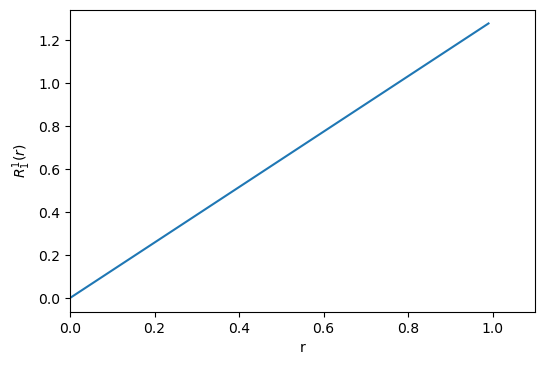

In [35]:
test_3dimg = np.zeros((10, 10, 10))

zen = Zernike3D(test_3dimg)

zen.plot_radial(1, 1)

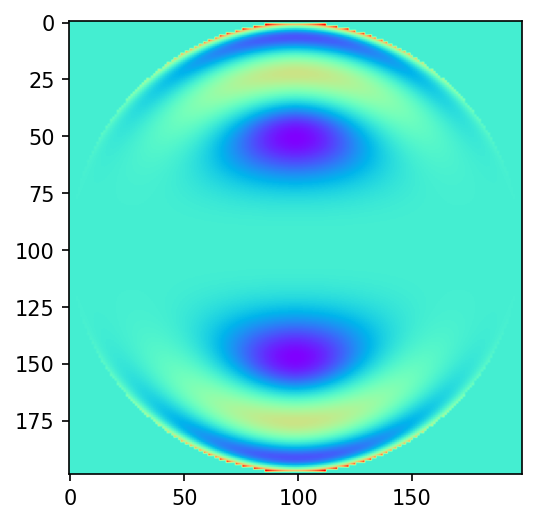

In [40]:
zen.plot_moment(10,4,4)